# Simple Linear Regression Task with Regularization Parameters.

# Energy Efficiency of Buildings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
energy_data = pd.read_excel("Energy.xlsx")

In [3]:
energy_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
energy_data.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [5]:
energy_data.columns=["Relative Compactness","Surface_area","Wall_area","Roof_area",
               "Overall_height","Orientation","Glazing_area","Glazing_area_Distribution",
               "Heating_load","Cooling_load"]

In [6]:
energy_data.head()

,Relative Compactness,Surface_area,Wall_area,Roof_area,Overall_height,Orientation,Glazing_area,Glazing_area_Distribution,Heating_load,Cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [7]:
energy_data.shape

(768, 10)

In [8]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface_area               768 non-null    float64
 2   Wall_area                  768 non-null    float64
 3   Roof_area                  768 non-null    float64
 4   Overall_height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_area               768 non-null    float64
 7   Glazing_area_Distribution  768 non-null    int64  
 8   Heating_load               768 non-null    float64
 9   Cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [9]:
energy_data.describe()

,Relative Compactness,Surface_area,Wall_area,Roof_area,Overall_height,Orientation,Glazing_area,Glazing_area_Distribution,Heating_load,Cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [10]:
energy_data.dtypes

Relative Compactness         float64
Surface_area                 float64
Wall_area                    float64
Roof_area                    float64
Overall_height               float64
Orientation                    int64
Glazing_area                 float64
Glazing_area_Distribution      int64
Heating_load                 float64
Cooling_load                 float64
dtype: object

# Exploratory  Data Analysis

In [11]:
energy_data[["Overall_height","Orientation","Glazing_area","Glazing_area_Distribution"]].nunique()

Overall_height               2
Orientation                  4
Glazing_area                 4
Glazing_area_Distribution    6
dtype: int64

In [12]:
def Histogramplot(df, feature, color):
    plt.figure(figsize =(10,12))
    plt.hist(df[feature], color = color)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.show()

In [13]:
hist_columns = ["Relative Compactness", "Surface_area", "Wall_area", "Roof_area",] 

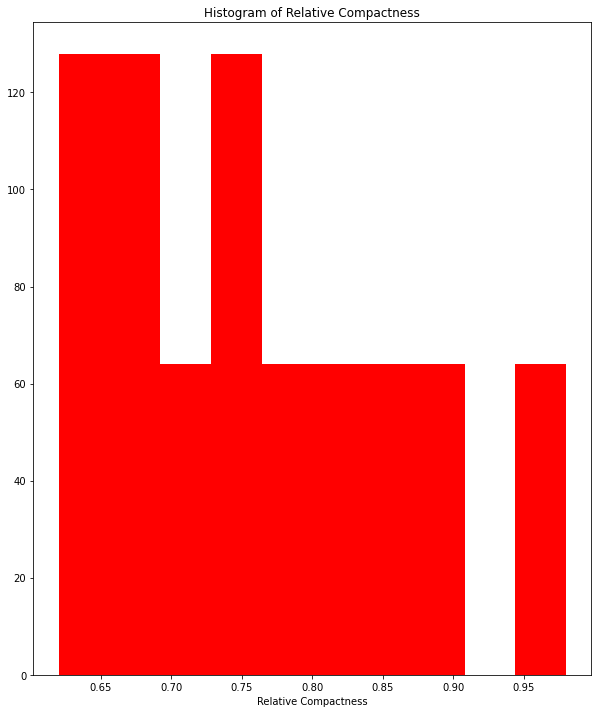

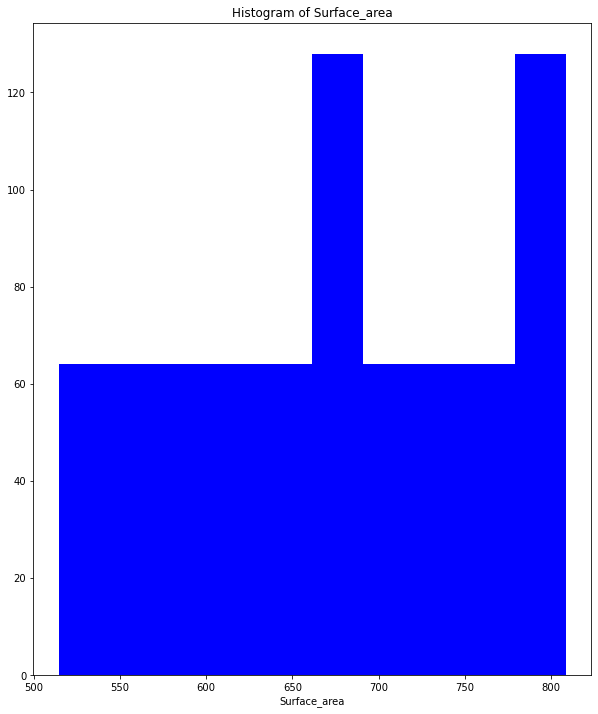

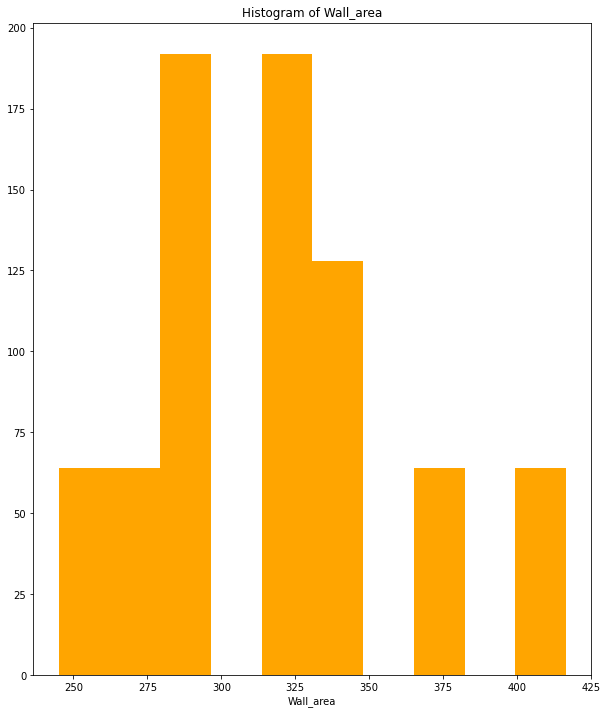

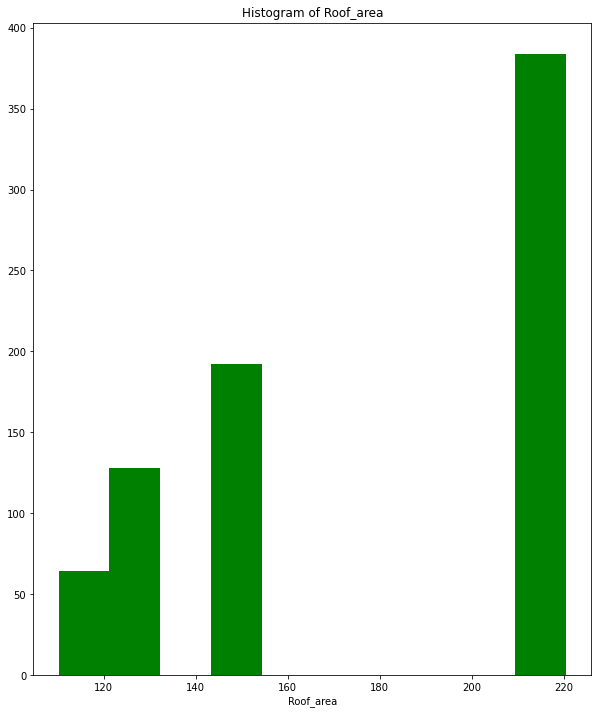

In [14]:
colors = ["red","blue","orange", "green"]
for feature, color in zip(hist_columns, colors):
    Histogramplot(energy_data, feature, color)

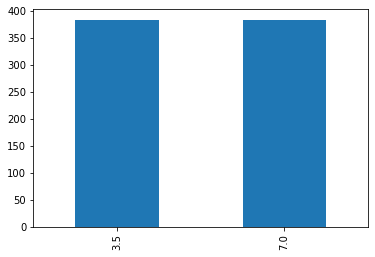

In [15]:
energy_data["Overall_height"].value_counts().plot(kind="bar")

In [16]:
energy_data.groupby(["Overall_height"])["Heating_load"].mean()

Overall_height
3.5    13.338505
7.0    31.275885
Name: Heating_load, dtype: float64

In [17]:
energy_data.groupby(["Overall_height"])["Cooling_load"].mean()

Overall_height
3.5    16.071432
7.0    33.104089
Name: Cooling_load, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


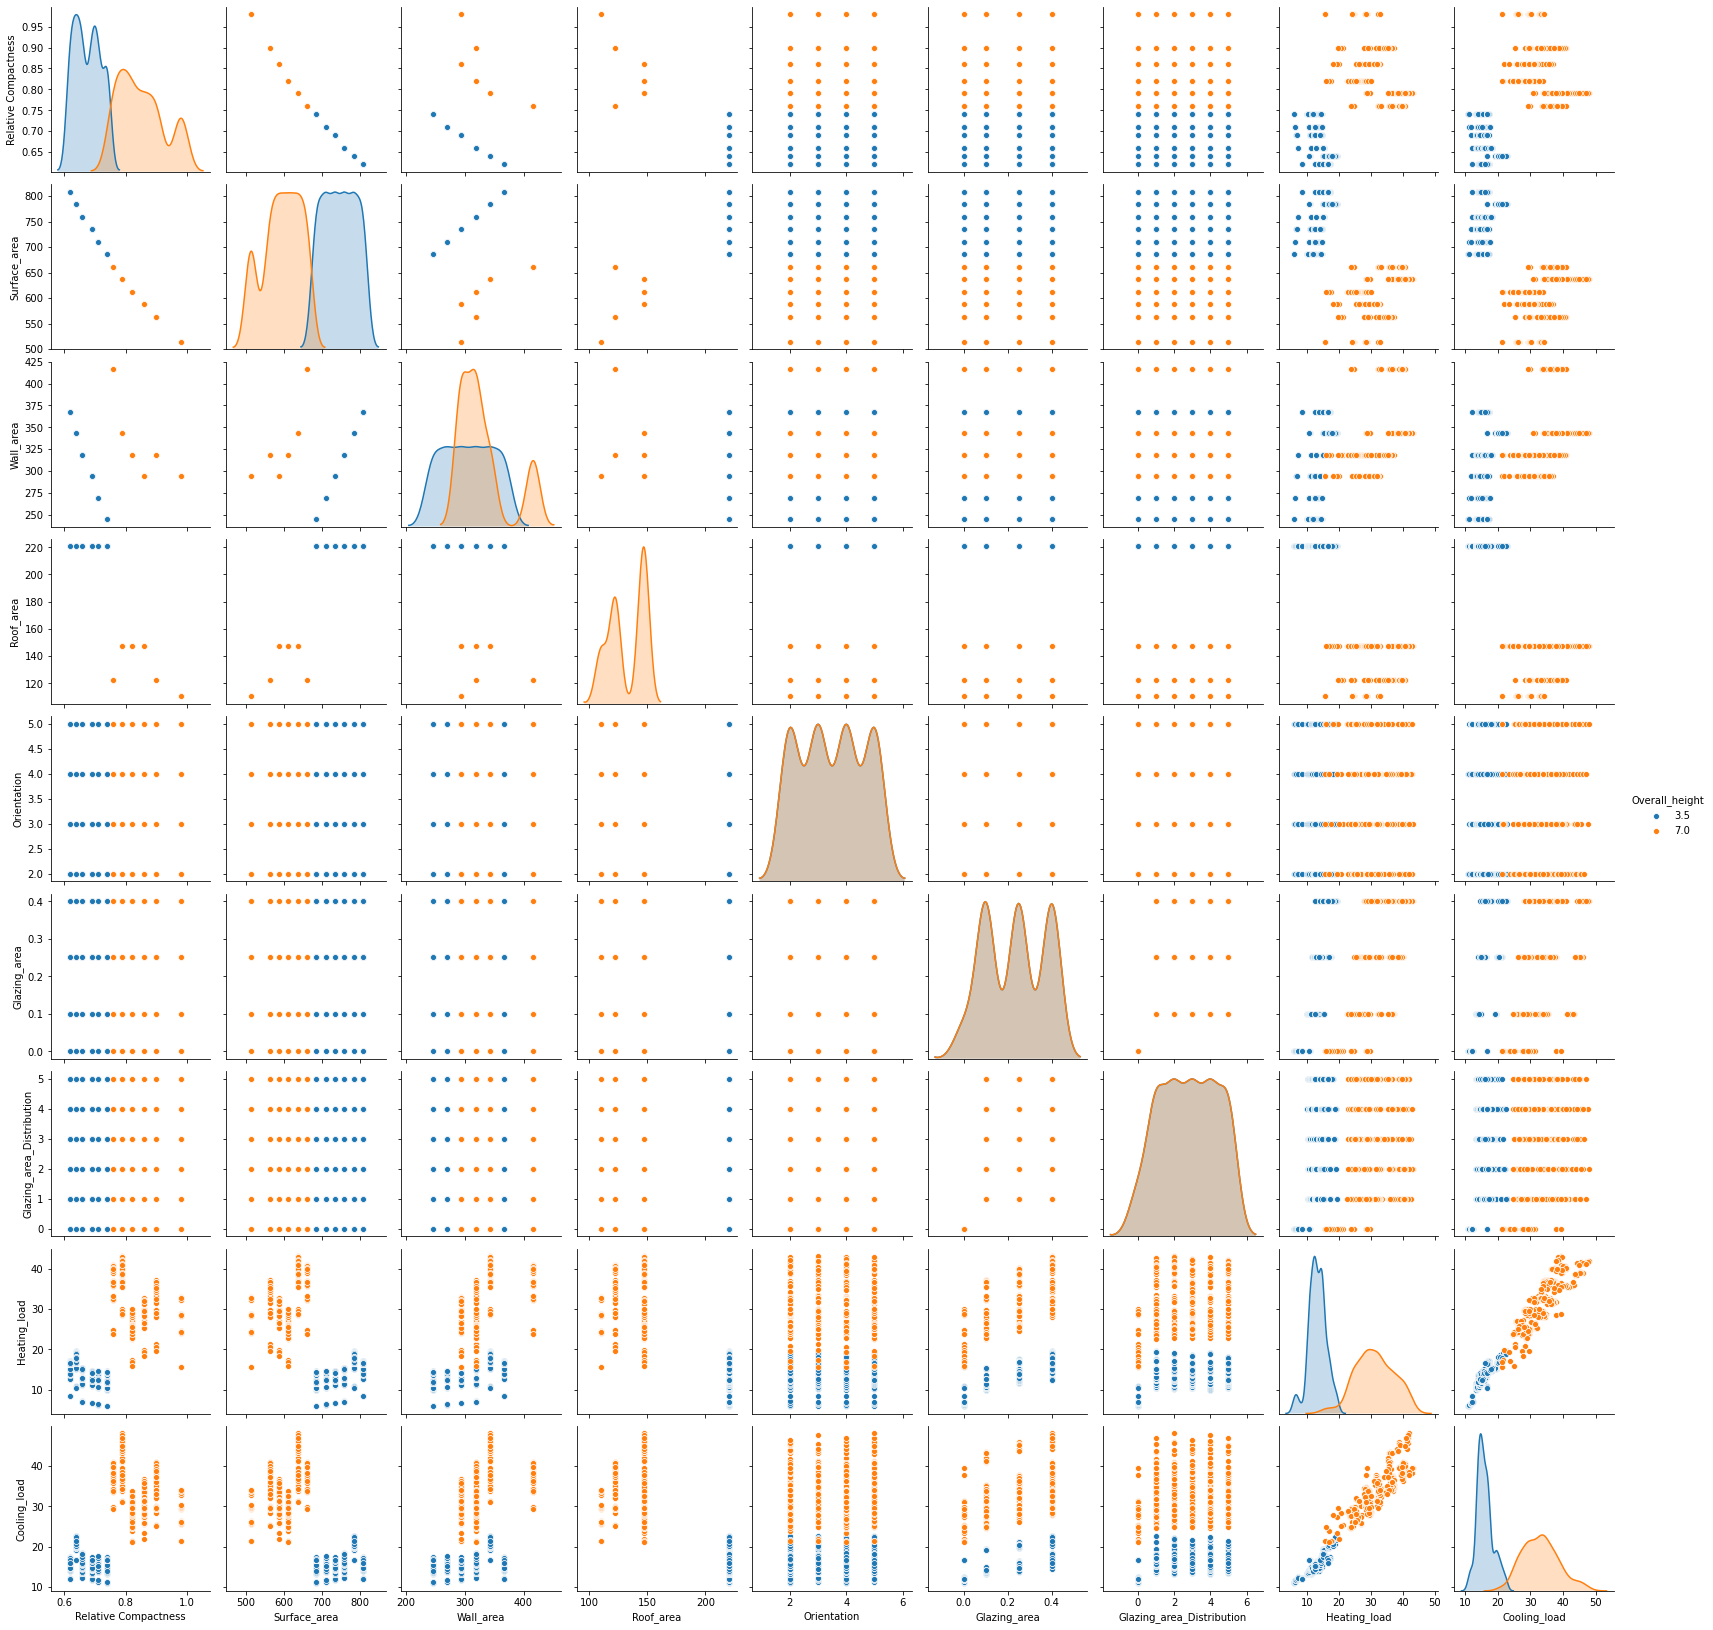

In [18]:
sns.pairplot(energy_data,hue='Overall_height')
plt.show()

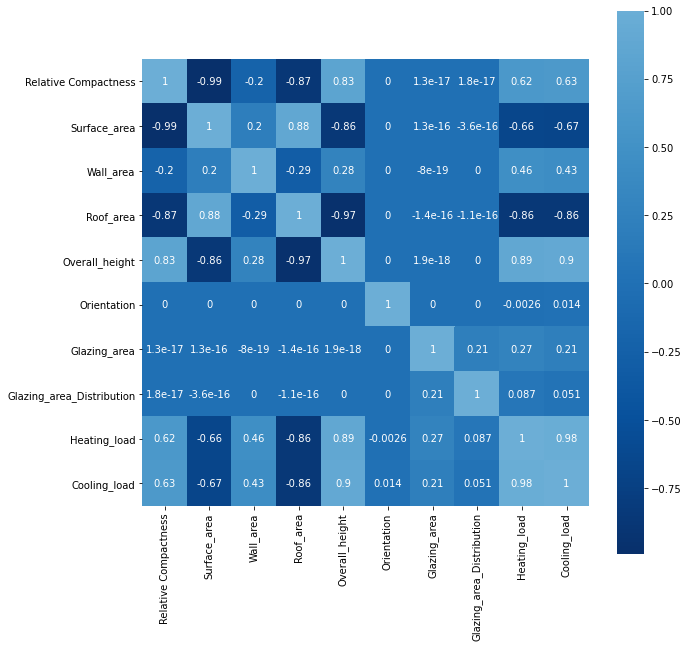

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(energy_data.corr(), annot = True,  cmap = "Blues_r",square=True, center =True )
plt.show()

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [21]:
linear_model  = LinearRegression(fit_intercept=True)

In [25]:
features = energy_data[list(energy_data.columns[:-2])]
features.head()

,Relative Compactness,Surface_area,Wall_area,Roof_area,Overall_height,Orientation,Glazing_area,Glazing_area_Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [27]:
target1 = energy_data['Heating_load']
target2 = energy_data['Cooling_load']


In [29]:
target1.head()

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Heating_load, dtype: float64

In [30]:
target2.head()

0    21.33
1    21.33
2    21.33
3    21.33
4    28.28
Name: Cooling_load, dtype: float64

## Splitting the dataset 

In [112]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train1, y_test1 = train_test_split(features, target1, test_size = 0.3, random_state =42)


## lets Fit the model now
linear_model.fit(x_train , y_train1)
y_pred1 = linear_model.predict(x_test)

## Lets try to increase the accuracy now using some feature selection techniques

print(linear_model.coef_)
print(linear_model.intercept_)

## Metrics for Linear Regression

In [ ]:
# lets find the model evaluation

from sklearn.metrics import r2_score , mean_squared_error

r_score = r2_score(y_test1, y_pred1)
mse = mean_squared_error(y_test1, y_pred1)

print(r_score)
print(mse)

# Ridge Regression

### Applying the some Regularization Parameters.

In [ ]:
def r_score_val(true, predict):
    return r2_score(true, predict)

def RidgeModel(model,feature, target, test_feature, target_feature):
    model.fit(feature, target)
    pred_by_ridge = model.predict(test_feature)
    r_score = r_score_val(target_feature, pred_by_ridge)
    print("r_score Values",r_score)
    print("coefficient Values",model.coef_)

In [127]:
# when alpha value is 0.01 
RidgeModel(Ridge(alpha=0.01), x_train, y_train1, x_test, y_test1)

r_score Values 0.908129380765221
coefficient Values [ 5.44597458 20.1838328   0.23624378  0.05249988  0.02777942]


In [128]:
# when alpha value is 0.001 the r_score Value is increasing
RidgeModel(Ridge(alpha=0.001), x_train, y_train1, x_test, y_test1)

r_score Values 0.9081237911446598
coefficient Values [ 5.44656046 20.20348069  0.23590305  0.0525003   0.02780236]


In [129]:
# when alpha value decreased to 0.1 then the r_score valus start decreasing
RidgeModel(Ridge(alpha=0.1), x_train, y_train1, x_test, y_test1)

r_score Values 0.908177897574921
coefficient Values [ 5.44012514 19.98943585  0.2396143   0.05249578  0.02755041]


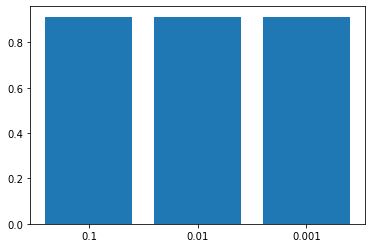

In [130]:
alpha_values = ["0.1", "0.01", "0.001"]
r_score_values = [0.9108686297438052,0.9126647260764251,0.9128141611639431]

plt.bar(alpha_values, r_score_values)
plt.show()

# Lasso Regression

In [62]:
def LassoModel(model,feature, target, test_feature, target_feature):
    model.fit(feature, target)
    pred_by_ridge = model.predict(test_feature)
    r_score = r_score_val(target_feature, pred_by_ridge)
    print("r_score Values",r_score)
    print("coefficient Values",model.coef_)


In [86]:
LassoModel(Lasso(alpha =0.001),x_train, y_train1, x_test, y_test1)

r_score Values 0.9081376035964347
coefficient Values [ 5.440117   20.14852248  0.23641964  0.05249652  0.02755444]


## Comparison of coeffiecients from this model.

In [71]:

def get_weights_df(model , feat, col_name):
    # This function returns the coefficient formed by Linear_model
    model.fit(feat , y_train1)
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns  = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df


In [72]:
linear_model_weights = get_weights_df(LinearRegression(fit_intercept=True), x_train,"Linear_model_weight")
ridge_model_weights = get_weights_df(Ridge(alpha =0.001), x_train, "Ridge Weight")
lasso_model_weights = get_weights_df(Lasso(alpha=0.001), x_train, "Lasso_weights")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121.774506380611, tolerance: 5.454953316424581
  model = cd_fast.enet_coordinate_descent(


In [73]:
linear_model_weights.head()

,Features,Linear_model_weight
0,Surface_area,-2.983219e+11
1,Relative Compactness,-6.393116e+01
2,Orientation,-2.352556e-02
3,Glazing_area_Distribution,2.306527e-01
4,Overall_height,4.125884e+00


In [75]:
ridge_model_weights

,Features,Ridge Weight
0,Relative Compactness,-62.781810
1,Surface_area,-0.060613
2,Roof_area,-0.048897
3,Orientation,-0.023282
4,Wall_area,0.037180
5,Glazing_area_Distribution,0.230858
6,Overall_height,4.147991
7,Glazing_area,19.929268


In [76]:
lasso_model_weights


,Features,Lasso_weights
0,Relative Compactness,-54.722921
1,Surface_area,-0.067269
2,Orientation,-0.020350
3,Roof_area,-0.010406
4,Wall_area,0.053579
5,Glazing_area_Distribution,0.232025
6,Overall_height,4.308762
7,Glazing_area,19.909492


In [77]:
final_weights = pd.merge(linear_model_weights, ridge_model_weights, on ="Features")
final_weights = pd.merge(final_weights, lasso_model_weights, on="Features")

In [78]:
final_weights

,Features,Linear_model_weight,Ridge Weight,Lasso_weights
0,Surface_area,-2.983219e+11,-0.060613,-0.067269
1,Relative Compactness,-6.393116e+01,-62.781810,-54.722921
2,Orientation,-2.352556e-02,-0.023282,-0.020350
3,Glazing_area_Distribution,2.306527e-01,0.230858,0.232025
4,Overall_height,4.125884e+00,4.147991,4.308762
5,Glazing_area,1.992632e+01,19.929268,19.909492
6,Wall_area,2.983219e+11,0.037180,0.053579
7,Roof_area,5.966438e+11,-0.048897,-0.010406


## Hyperparameter Tunings

In [113]:
# Lets do Hyper Parameter Training.
from sklearn.model_selection import cross_val_score

linear = LinearRegression()
clf = cross_val_score(linear, x_train , y_train1, cv =5)

In [114]:
clf

array([0.91279422, 0.89721055, 0.91949649, 0.92236765, 0.89675821])

In [115]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (clf.mean(), clf.std()))

0.91 accuracy with a standard deviation of 0.01


In [116]:
linear = LinearRegression()
clf = cross_val_score(linear, x_train , y_train1,cv =5,scoring ="r2")

In [117]:
clf

array([0.91279422, 0.89721055, 0.91949649, 0.92236765, 0.89675821])

In [118]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (clf.mean(), clf.std()))

0.91 accuracy with a standard deviation of 0.01


In [119]:
# Hyperparameter Training using Grid Search CV

from sklearn.model_selection import GridSearchCV

params ={
        "fit_intercept": [True, False],
    "normalize": [True ,False]
}

linear= LinearRegression()
grid = GridSearchCV(estimator = linear,param_grid = params, cv =5 )
grid.fit(x_train , y_train1)



GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [120]:
grid.best_params_

{'fit_intercept': True, 'normalize': True}

In [125]:
linear = LinearRegression(fit_intercept= True, normalize =True)
linear.fit(x_train , y_train1)
pred = linear.predict(x_test)
r2_score(y_test1, pred)

0.9081231616226121

#### There is no increment the accuracy when we performed the hyper parameter tuning. 

### Lasso Regression performed well from all the Model.